# **AS events vs X chromosomal escape**


It has been reported that differentially expressed sex-biased genes are likely to be 
linked to escape from X chromosome inactivation (Landscape of X chromosome inactivation across human tissues.
Tukiainen T, et al. Nature. 2017 Oct 11;550(7675):244-248). 

Because of the observed overlap between sex-biased differential expression and AS, we hypothesized that AS e
vents might be more commonly observed in X chromosomal genes that escape inactivation. 

## Retrieve data about X chromosomal escape
This data was extracted from the supplemental material of the Tukiainen paper. Genes are characterized as

1. Escape
2. Inactive
3. Variable
4. Unknown

We examine here the hypothesis that alternatively spliced genes are more likely to escape X inactivation than one would expect
from the X chromosomal average. We compare the proportions of genes labeled ``Escape`` and ``Inactive`` using a Fisher exact test.

In [1]:
xchromgenetable <- read.table(file="../assets/TukiainenSuppFig2extract.tsv", header=FALSE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
colnames(xchromgenetable)  <- c("ENSG.id","symbol","escape.status","par.status")

In [2]:
head(xchromgenetable)

,ENSG.id,symbol,escape.status,par.status
,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000003.10,TSPAN6,Variable,nonPAR
2,ENSG00000000005.5,TNMD,Unknown,nonPAR
3,ENSG00000001497.12,LAS1L,Inactive,nonPAR
4,ENSG00000002586.13,CD99,Escape,PAR
5,ENSG00000003096.9,KLHL13,Inactive,nonPAR
6,ENSG00000004848.6,ARX,Unknown,nonPAR


In [3]:
XchromGenes <- sort(xchromgenetable$symbol)

In [4]:
escaped <- sort(xchromgenetable[xchromgenetable$escape.status=='Escape',]$symbol)
message("Escaped X chromomosal genes: ", length(escaped))

Escaped X chromomosal genes: 94



In [5]:
inactive <- sort(xchromgenetable[xchromgenetable$escape.status=='Inactive',]$symbol)
message("Inactive X chromomosal genes: ", length(inactive))

Inactive X chromomosal genes: 408



In [6]:
x.escape.len <- length(escaped)
x.inactive.len <- length(inactive)
message("X chr escape: ", x.escape.len, " X chr  inactive: ", x.inactive.len)

X chr escape: 94 X chr  inactive: 408



# Get set of genes that show significant alternative splicing in at least one tissue

In [7]:
total_AS_Genes <- read.table(file="../data/Total_AS_by_geneSymbol.tsv", header=TRUE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)

In [8]:
head(total_AS_Genes)

,GeneSymbol,n
,<chr>,<int>
1,XIST,342
2,DDX3X,97
3,KDM5C,47
4,ZFX,47
5,KDM6A,27
6,UCA1,25


In [9]:
sigAsGenes <- sort(total_AS_Genes$GeneSymbol)

In [10]:
# First collect the numbers
as.escape <- intersect(escaped, sigAsGenes)
as.inactive <- intersect(inactive, sigAsGenes)
as.escape.len <- length(as.escape)
as.inactive.len <- length(as.inactive)
message("AS escape: ", as.escape.len, " AS inactive: ", as.inactive.len)

AS escape: 22 AS inactive: 51



# Get set of genes that show significant differential expression in at least one tissue
Note that one of the column headers is blank and so we just skip one line to avoid a parse error.

In [11]:
dge <- read.table("../data/gene_dge.tsv", sep = "\t", header = FALSE, row.names=1, skip = 1)

In [12]:
head(dge)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,adipose_subcutaneous,ENSG00000176728.7,ENSG00000176728,TTTY14,765,Adipose (sc),-7.982166,-0.9288129,-139.8230,0,0,1107.423
2,adipose_subcutaneous,ENSG00000231535.5,ENSG00000231535,LINC00278,765,Adipose (sc),-6.095420,-2.7765638,-126.9138,0,0,1050.366
3,adipose_subcutaneous,ENSG00000129824.15,ENSG00000129824,RPS4Y1,765,Adipose (sc),-9.664190,4.6352877,-125.8271,0,0,1041.877
4,adipose_subcutaneous,ENSG00000067646.11,ENSG00000067646,ZFY,765,Adipose (sc),-9.504590,0.6727555,-125.0371,0,0,1033.611
5,adipose_subcutaneous,ENSG00000229807.10,ENSG00000229807,XIST,765,Adipose (sc),9.892810,1.2375604,121.6969,0,0,1030.178
6,adipose_subcutaneous,ENSG00000229236.1,ENSG00000229236,TTTY10,765,Adipose (sc),-6.209013,-2.7452436,-122.5403,0,0,1029.414


In [13]:
dge_genes <- dge$V5
head(dge_genes)

[1] TTTY14    LINC00278 RPS4Y1    ZFY       XIST      TTTY10   
7417 Levels: A2M A2ML1 A4GNT AACSP1 AADAC AADACL2-AS1 AADACL3 AADACL4 ... ZYG11A

In [14]:
dge_genes <- sort(dge_genes)
dge.escape <- intersect(escaped, dge_genes)
dge.inactive <- intersect(inactive, dge_genes)
dge.escape.len <- length(dge.escape)
dge.inactive.len <- length(dge.inactive)
message("DGE escape: ", x.escape.len, " DGE  inactive: ", x.inactive.len)

DGE escape: 94 DGE  inactive: 408



# **Make grouped bar plot**
### First collect the counts of escape/inactive/variable X chromosomal, AS, and DGE genes

In [15]:
# Colors for uniformity
# Let's use the following colors for uniformity
darkblue <- "#3c5488"
blue <- "#4BDDB5"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"
green <- "#00A087"


### Transform counts into percentages

In [16]:
as.total <- as.escape.len + as.inactive.len
as.escape.per <- 100 * as.escape.len/as.total
as.inactive.per <- 100 * as.inactive.len/as.total
x.total <- x.escape.len + x.inactive.len
x.escape.per <- 100 * x.escape.len/x.total
x.inactive.per <- 100 * x.inactive.len/x.total
dge.total <- dge.escape.len + dge.inactive.len
dge.escape.per <- 100 * dge.escape.len/dge.total
dge.inactive.per <- 100 * dge.inactive.len/dge.total
message("AS escape: ", as.escape.per, " AS inactive: ", as.inactive.per)
message("X chr escape: ", x.escape.per, " X chr inactive: ", x.inactive.per)
message("DGE escape: ", dge.escape.per, " DGE inactive: ", dge.inactive.per)

AS escape: 30.1369863013699 AS inactive: 69.8630136986301

X chr escape: 18.7250996015936 X chr inactive: 81.2749003984064

DGE escape: 40.5940594059406 DGE inactive: 59.4059405940594



Saving 6.67 x 6.67 in image

Saved plot as ../pdf/XchromosomalEscape.pdf



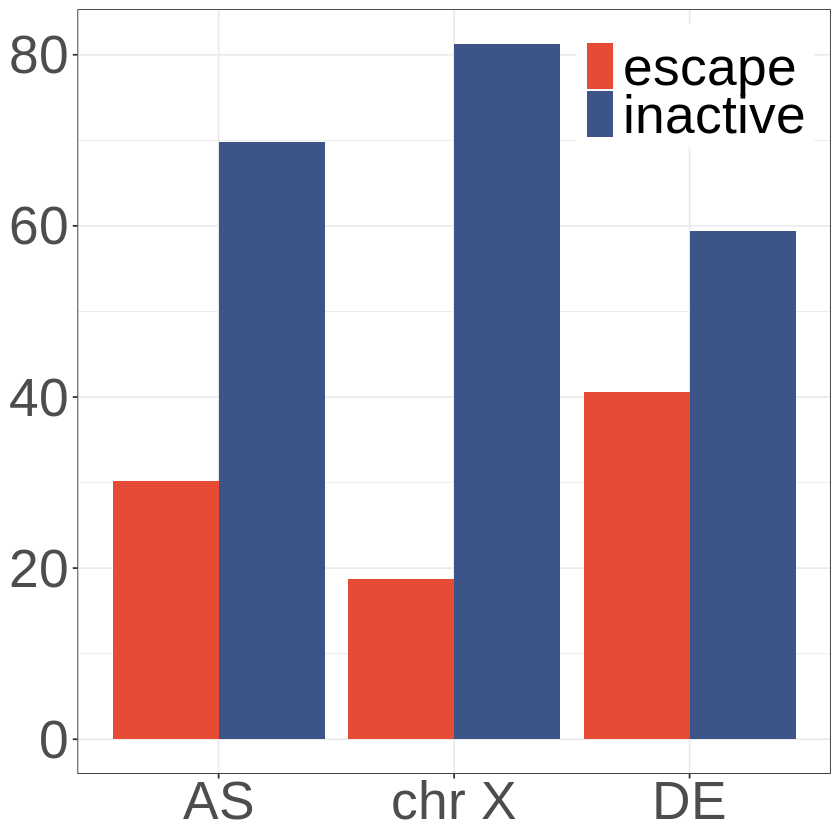

In [17]:
library(ggplot2)
 
# create a dataset
category <- c(rep("AS" , 2) , rep("chr X" , 2) , rep("DE" , 2) )
condition <- rep(c("escape" , "inactive") , 3)
value <- c(as.escape.per, as.inactive.per,x.escape.per, x.inactive.per,dge.escape.per, dge.inactive.per)
data <- data.frame(category,condition,value)


 
# Grouped
g <- ggplot(data, aes(fill=condition, y=value, x=category), color=barcolors) + 
    geom_bar(position="dodge", stat="identity") +
    theme_bw() +
    scale_fill_manual(values=c(red, darkblue)) +
    theme(axis.text = element_text(size=32),
          axis.title = element_blank(),
          legend.title = element_blank(),
          legend.text = element_text(size = 32),
          legend.position = c(0.82,0.9)
          )
ggsave("../pdf/XchromosomalEscape.pdf",g)
message("Saved plot as ../pdf/XchromosomalEscape.pdf")
g

# Chi2 test

In [18]:
# compare chr X against DGE
x_vs_dge <- matrix(c(x.escape.len, x.inactive.len,dge.escape.len, dge.inactive.len), nrow=2,byrow = TRUE)
x_vs_dge

94,408
41,60


In [19]:
fisher.test(x_vs_dge)


	Fisher's Exact Test for Count Data

data:  x_vs_dge
p-value = 5.838e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2090518 0.5486638
sample estimates:
odds ratio 
 0.3378635 


In [20]:
# compare chr X against AS
x_vs_as  <- matrix(c(x.escape.len, x.inactive.len,as.escape.len, as.inactive.len), nrow=2,byrow = TRUE)
x_vs_as

94,408
22,51


In [21]:
fisher.test(x_vs_as)


	Fisher's Exact Test for Count Data

data:  x_vs_as
p-value = 0.0287
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3011371 0.9735331
sample estimates:
odds ratio 
 0.5347341 
